Завдання 1

Створити нейронну мережу (модель) з використанням згорткових шарів для датасета
cifar 10 (mnist, fasion mnist).


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report
import numpy as np


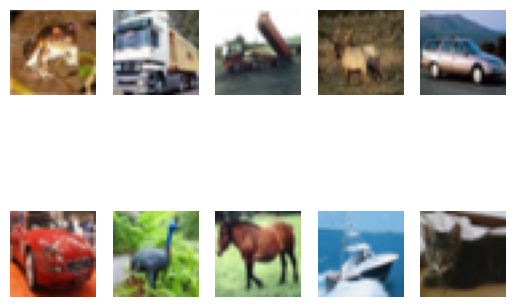

In [2]:
#1. для цього завантажити датасет, вивести перші 10 зображень.
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()

In [3]:
#2. Підготувати дані.
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [4]:
#3. Підібрати архітектуру моделі (кількість шарів, оптимізатор, розмір батча, кількість епох).
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
#4. При навчанні використовувати кол-бекі (рання зупинка та (або) зменшення швидкості навчання).
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)

history = model.fit(X_train, y_train, batch_size=64, epochs=20, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr])

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 97ms/step - accuracy: 0.2948 - loss: 1.8768 - val_accuracy: 0.5069 - val_loss: 1.3773 - learning_rate: 0.0010
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 103ms/step - accuracy: 0.5277 - loss: 1.3145 - val_accuracy: 0.5946 - val_loss: 1.1375 - learning_rate: 0.0010
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 101ms/step - accuracy: 0.5959 - loss: 1.1418 - val_accuracy: 0.6374 - val_loss: 1.0288 - learning_rate: 0.0010
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.6388 - loss: 1.0179 - val_accuracy: 0.6605 - val_loss: 0.9636 - learning_rate: 0.0010
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 94ms/step - accuracy: 0.6699 - loss: 0.9351 - val_accuracy: 0.6782 - val_loss: 0.9150 - learning_rate: 0.0010
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 93ms/step - accuracy: 0.7001 - loss: 0.8540 - val_accuracy: 0.6979 - val_loss: 0.8739 - learning_rate: 0.0010
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 90ms/step - accuracy: 0.7226 -

In [6]:
#5. вивести summary.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 681,440 (2.60 MB)

 Trainable params: 227,146 (887.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 454,294 (1.73 MB)

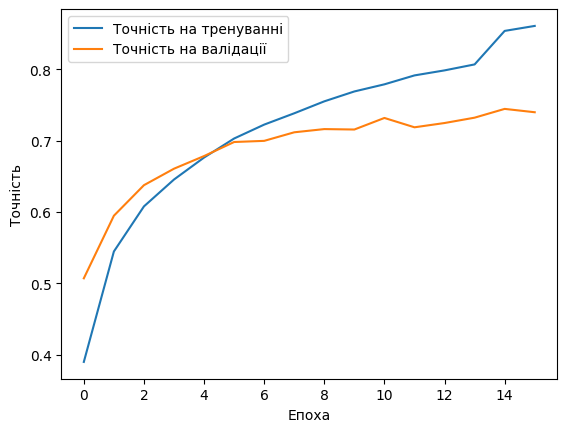

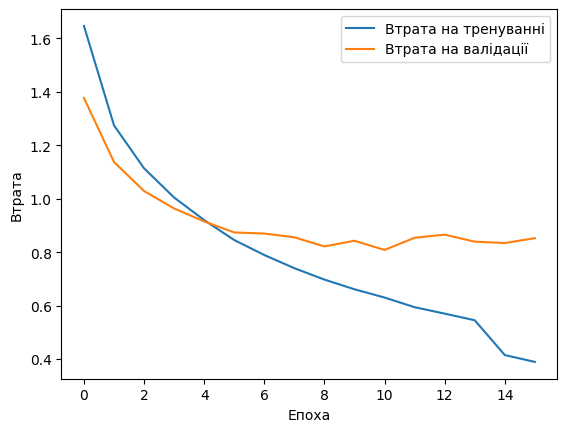

In [7]:
#6. побудувати графіки функції втрат і точності.
plt.plot(history.history['accuracy'], label='Точність на тренуванні')
plt.plot(history.history['val_accuracy'], label='Точність на валідації')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Втрата на тренуванні')
plt.plot(history.history['val_loss'], label='Втрата на валідації')
plt.xlabel('Епоха')
plt.ylabel('Втрата')
plt.legend()
plt.show()

In [8]:
#7. класифікаційний звіт.
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

print(classification_report(y_true, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
              precision    recall  f1-score   support

           0       0.71      0.83      0.76      1000
           1       0.88      0.81      0.84      1000
           2       0.65      0.62      0.63      1000
           3       0.64      0.46      0.54      1000
           4       0.66      0.70      0.68      1000
           5       0.65      0.63      0.64      1000
           6       0.74      0.84      0.79      1000
           7       0.75      0.79      0.77      1000
           8       0.82      0.83      0.83      1000
           9       0.79      0.82      0.80      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



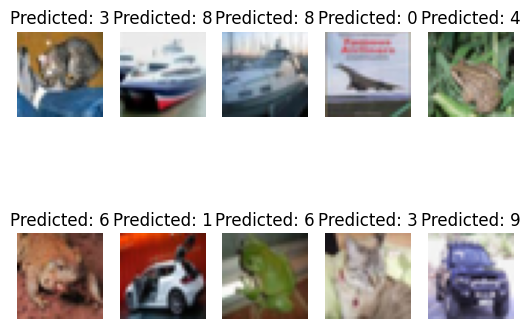

In [9]:
#8. візуалізацію розпізнавання.
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {y_pred_classes[i]}")
    plt.axis('off')
plt.show()